In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
df=pd.read_csv("cancer1.csv")

In [10]:
df.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNuci,Mit,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [11]:
df.tail()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNuci,Mit,Class
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4
697,897471,4,8,8,5,4,5,10,4,1,4


In [12]:
df.shape

(698, 11)

In [13]:
df.size

7678

In [14]:
df.count()

ID             698
Clump          698
UnifSize       698
UnifShape      698
MargAdh        698
SingEpiSize    698
BareNuc        698
BlandChrom     698
NormNuci       698
Mit            698
Class          698
dtype: int64

In [15]:
df['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

In [16]:
benign=df[df['Class']==2]
malignant=df[df['Class']==4]

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Clump', ylabel='UnifSize'>

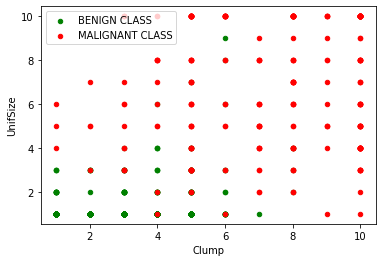

In [20]:
axes=benign.plot(kind='scatter',x='Clump',y='UnifSize',color='green',label='BENIGN CLASS')
malignant.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='MALIGNANT CLASS',ax=axes)

In [21]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNuci        int64
Mit             int64
Class           int64
dtype: object

In [22]:
df=df[pd.to_numeric(df['BareNuc'],errors="coerce").notnull()]

In [23]:
df['BareNuc']=df['BareNuc'].astype("int")

In [24]:
df.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNuci       int64
Mit            int64
Class          int64
dtype: object

In [25]:
df.columns


Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNuci', 'Mit', 'Class'],
      dtype='object')

In [26]:
feature=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNuci', 'Mit']]

In [27]:
x=np.asarray(feature)

In [28]:
y=np.asarray(df['Class'])

In [29]:
x

array([[ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       [ 6,  8,  8, ...,  3,  7,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [30]:
y


array([2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2,

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
x_train.shape

(545, 9)

In [35]:
x_test.shape

(137, 9)

In [37]:
y_train.shape

(545,)

In [38]:
y_test.shape

(137,)

In [39]:
from sklearn import svm

In [41]:
model=svm.SVC(kernel='linear',gamma='auto',C=0.3)

In [43]:
model.fit(x_train,y_train)

SVC(C=0.3, gamma='auto', kernel='linear')

In [44]:
y_predicted=model.predict(x_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           2       0.94      0.99      0.96        88
           4       0.98      0.88      0.92        49

    accuracy                           0.95       137
   macro avg       0.96      0.93      0.94       137
weighted avg       0.95      0.95      0.95       137

